# Into the Future

From initial inspection of the data we can see that the data is a time series. 
Understanding that 

In [1]:
import pandas as pd
import numpy as np 

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm

import itertools

In [2]:
train = pd.read_csv("Data/train.csv")

In [3]:
train.drop('id',axis=1,inplace=True)


Lets look at the data

In [4]:
train

,time,feature_1,feature_2
0,2019-03-19 00:00:00,735.740043,54479.540513
1,2019-03-19 00:00:10,734.102947,47888.033714
2,2019-03-19 00:00:20,730.060336,47700.882325
3,2019-03-19 00:00:30,725.609742,47790.094648
4,2019-03-19 00:00:40,724.328480,47808.402381
...,...,...,...
559,2019-03-19 01:33:10,423.726707,54115.388787
560,2019-03-19 01:33:20,424.278568,54127.830664
561,2019-03-19 01:33:30,420.127639,54092.561194
562,2019-03-19 01:33:40,421.291993,53994.714950


Lets see if there are any missing values

In [5]:
train.isnull().sum()

time         0
feature_1    0
feature_2    0
dtype: int64

In [6]:
train['time'] = pd.to_datetime(train['time'])

In [7]:
train.time.min(),train.time.max()

(Timestamp('2019-03-19 00:00:00'), Timestamp('2019-03-19 01:33:50'))

Confirming data types

In [8]:
train.dtypes

time         datetime64[ns]
feature_1           float64
feature_2           float64
dtype: object

In [9]:
train = train[['time','feature_2']]

Sorting the values according to time : (Doing the folowing to build a template for future work)

In [10]:
train.sort_values(['time'],axis=0,inplace=True)
train

C:\Users\samla\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,time,feature_2
0,2019-03-19 00:00:00,54479.540513
1,2019-03-19 00:00:10,47888.033714
2,2019-03-19 00:00:20,47700.882325
3,2019-03-19 00:00:30,47790.094648
4,2019-03-19 00:00:40,47808.402381
...,...,...
559,2019-03-19 01:33:10,54115.388787
560,2019-03-19 01:33:20,54127.830664
561,2019-03-19 01:33:30,54092.561194
562,2019-03-19 01:33:40,53994.714950


In [11]:
train = train.groupby('time')['feature_2'].mean().reset_index()

In [12]:
train.set_index('time',inplace=True)

In [13]:
train

,feature_2
time,
2019-03-19 00:00:00,54479.540513
2019-03-19 00:00:10,47888.033714
2019-03-19 00:00:20,47700.882325
2019-03-19 00:00:30,47790.094648
2019-03-19 00:00:40,47808.402381
...,...
2019-03-19 01:33:10,54115.388787
2019-03-19 01:33:20,54127.830664
2019-03-19 01:33:30,54092.561194


In [14]:
y = train.resample('10S').mean()

In [15]:
y

,feature_2
time,
2019-03-19 00:00:00,54479.540513
2019-03-19 00:00:10,47888.033714
2019-03-19 00:00:20,47700.882325
2019-03-19 00:00:30,47790.094648
2019-03-19 00:00:40,47808.402381
...,...
2019-03-19 01:33:10,54115.388787
2019-03-19 01:33:20,54127.830664
2019-03-19 01:33:30,54092.561194


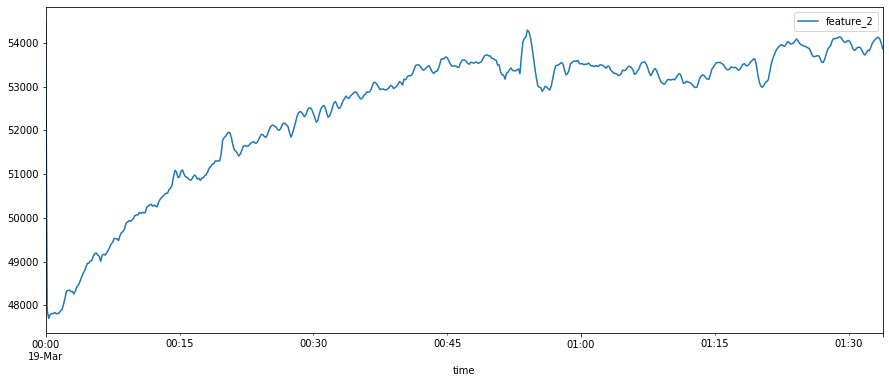

In [16]:
y.plot(figsize=(15, 6))
plt.show()

In [17]:
y

,feature_2
time,
2019-03-19 00:00:00,54479.540513
2019-03-19 00:00:10,47888.033714
2019-03-19 00:00:20,47700.882325
2019-03-19 00:00:30,47790.094648
2019-03-19 00:00:40,47808.402381
...,...
2019-03-19 01:33:10,54115.388787
2019-03-19 01:33:20,54127.830664
2019-03-19 01:33:30,54092.561194


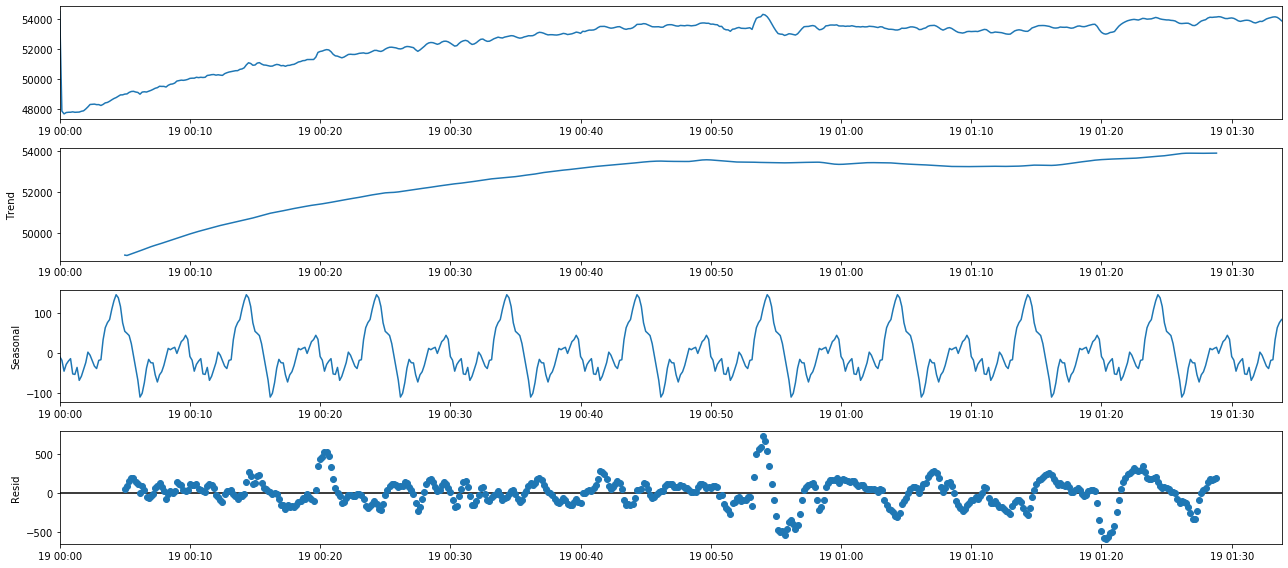

In [18]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(y, model='additive', period = 60) #10 min
fig = decomposition.plot()
plt.show()

In [19]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 60) for x in pdq] #10mins 6 sets of 10 secs into 10 such sets..so 60

print(pdq)
seasonal_pdq

[(0, 0, 0), (0, 0, 1), (0, 1, 0), (0, 1, 1), (1, 0, 0), (1, 0, 1), (1, 1, 0), (1, 1, 1)]


[(0, 0, 0, 60),
 (0, 0, 1, 60),
 (0, 1, 0, 60),
 (0, 1, 1, 60),
 (1, 0, 0, 60),
 (1, 0, 1, 60),
 (1, 1, 0, 60),
 (1, 1, 1, 60)]

In [22]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}:- AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 60):- AIC:13837.89724867
ARIMA(0, 0, 0)x(0, 0, 1, 60):- AIC:12038.502946697956
ARIMA(0, 0, 0)x(0, 1, 0, 60):- AIC:8304.571378561417
ARIMA(0, 0, 0)x(0, 1, 1, 60):- AIC:6977.212097551189
ARIMA(0, 0, 0)x(1, 0, 0, 60):- AIC:8117.160583670182
ARIMA(0, 0, 0)x(1, 0, 1, 60):- AIC:7733.621806639067
ARIMA(0, 0, 0)x(1, 1, 0, 60):- AIC:6794.623028584909
ARIMA(0, 0, 0)x(1, 1, 1, 60):- AIC:6674.756847229208
ARIMA(0, 0, 1)x(0, 0, 0, 60):- AIC:13401.49899800973
ARIMA(0, 0, 1)x(0, 0, 1, 60):- AIC:11886.416006508181
ARIMA(0, 0, 1)x(0, 1, 0, 60):- AIC:7814.984958099649
ARIMA(0, 0, 1)x(0, 1, 1, 60):- AIC:6378.488069424663
ARIMA(0, 0, 1)x(1, 0, 0, 60):- AIC:11888.532649763176
ARIMA(0, 0, 1)x(1, 0, 1, 60):- AIC:11843.305215086679
ARIMA(0, 0, 1)x(1, 1, 0, 60):- AIC:6460.754947036769
ARIMA(0, 0, 1)x(1, 1, 1, 60):- AIC:6266.3057654167515
ARIMA(0, 1, 0)x(0, 0, 0, 60):- AIC:6372.425381365792
ARIMA(0, 1, 0)x(0, 0, 1, 60):- AIC:5690.541465683288
ARIMA(0, 1, 0)x(0, 1, 0, 60):- AIC:6067.0190

C:\Users\samla\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 0)x(0, 0, 1, 60):- AIC:5696.513319031765
ARIMA(1, 0, 0)x(0, 1, 0, 60):- AIC:7180.095165690662
ARIMA(1, 0, 0)x(0, 1, 1, 60):- AIC:5354.735123752877
ARIMA(1, 0, 0)x(1, 0, 0, 60):- AIC:6651.578183942549
ARIMA(1, 0, 0)x(1, 0, 1, 60):- AIC:6653.462728745797
ARIMA(1, 0, 0)x(1, 1, 0, 60):- AIC:5354.980976980092
ARIMA(1, 0, 0)x(1, 1, 1, 60):- AIC:5325.669850701973
ARIMA(1, 0, 1)x(0, 0, 0, 60):- AIC:6173.535789136065


C:\Users\samla\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 1)x(0, 0, 1, 60):- AIC:5491.3384545088975
ARIMA(1, 0, 1)x(0, 1, 0, 60):- AIC:6027.948199600325
ARIMA(1, 0, 1)x(0, 1, 1, 60):- AIC:4932.45999126117
ARIMA(1, 0, 1)x(1, 0, 0, 60):- AIC:5496.535576466544
ARIMA(1, 0, 1)x(1, 0, 1, 60):- AIC:5512.819121674408
ARIMA(1, 0, 1)x(1, 1, 0, 60):- AIC:5147.145419335697
ARIMA(1, 0, 1)x(1, 1, 1, 60):- AIC:4931.460741106814
ARIMA(1, 1, 0)x(0, 0, 0, 60):- AIC:6339.391367216215
ARIMA(1, 1, 0)x(0, 0, 1, 60):- AIC:5484.813954515659
ARIMA(1, 1, 0)x(0, 1, 0, 60):- AIC:6031.785598773713
ARIMA(1, 1, 0)x(0, 1, 1, 60):- AIC:5124.402204702572
ARIMA(1, 1, 0)x(1, 0, 0, 60):- AIC:5485.106349345297
ARIMA(1, 1, 0)x(1, 0, 1, 60):- AIC:5486.809730605656
ARIMA(1, 1, 0)x(1, 1, 0, 60):- AIC:5123.931916373145
ARIMA(1, 1, 0)x(1, 1, 1, 60):- AIC:5041.334159452817
ARIMA(1, 1, 1)x(0, 0, 0, 60):- AIC:6126.506110397665
ARIMA(1, 1, 1)x(0, 0, 1, 60):- AIC:5455.634403094282
ARIMA(1, 1, 1)x(0, 1, 0, 60):- AIC:5837.950353851738
ARIMA(1, 1, 1)x(0, 1, 1, 60):- AIC:4918.472453

The above output suggests that SARIMAX(1, 1, 1)x(0, 1, 1, 60) yields the lowest AIC value. Therefore we should consider this to be optimal option.

In [20]:
mod = sm.tsa.statespace.SARIMAX(y)
results = mod.fit()
print(results.aic)
print(results.summary().tables[1])

7996.868770325971
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.0000      0.000   5388.031      0.000       1.000       1.000
sigma2      8.214e+04    400.457    205.126      0.000    8.14e+04    8.29e+04


In [21]:
mod = sm.tsa.statespace.SARIMAX(y,
                                order=(1, 1, 1),
                                seasonal_order=(0, 1, 1, 60),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.aic)
print(results.summary().tables[1])

4918.4724531330885
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0379      0.014      2.693      0.007       0.010       0.065
ma.L1          0.5881      0.036     16.390      0.000       0.518       0.658
ma.S.L60      -0.9994     17.387     -0.057      0.954     -35.076      33.078
sigma2      3221.2061   5.59e+04      0.058      0.954   -1.06e+05    1.13e+05


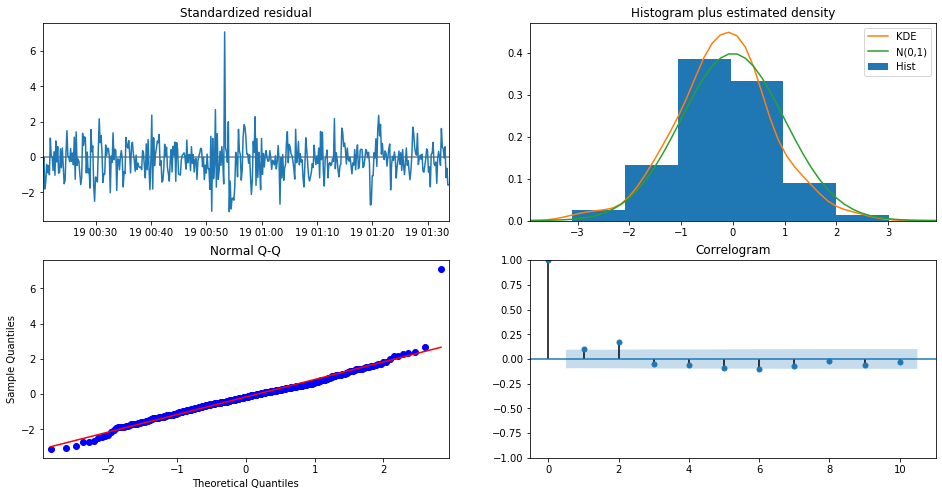

In [22]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

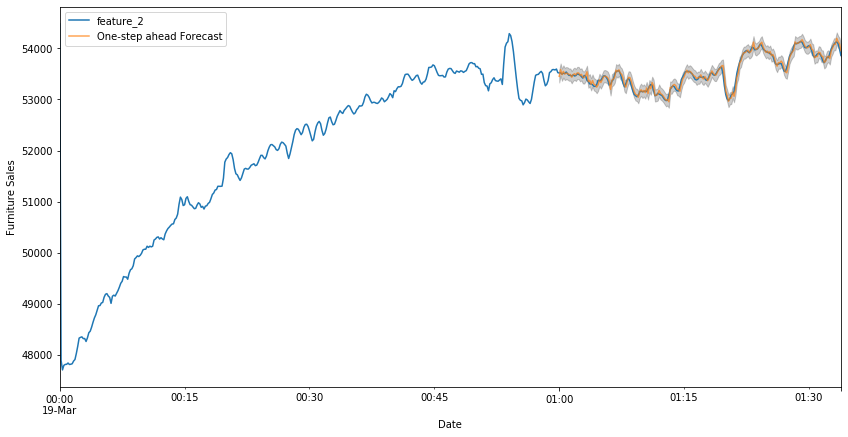

In [23]:
pred = results.get_prediction(start=pd.to_datetime('2019-03-19 01:00:00'), dynamic=False)
pred_ci = pred.conf_int()
ax = y.plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')
plt.legend()
plt.show()

Testing for test data 

In [24]:
test = pd.read_csv('Data/test.csv')
test['time'] = pd.to_datetime(test['time'])
test.sort_values(['time'],axis=0,inplace=True)
test.set_index('time',inplace=True)

In [25]:
test.index.max()

Timestamp('2019-03-19 02:36:20')

In [26]:
test

,id,feature_1
time,,
2019-03-19 01:34:00,564,423.064004
2019-03-19 01:34:10,565,423.342749
2019-03-19 01:34:20,566,423.181186
2019-03-19 01:34:30,567,421.275243
2019-03-19 01:34:40,568,422.208444
...,...,...
2019-03-19 02:35:40,934,432.292203
2019-03-19 02:35:50,935,433.661272
2019-03-19 02:36:00,936,435.686429


In [27]:
pred = results.get_prediction(start=test.index.min(),end=test.index.max(), dynamic=False)
pred.predicted_mean

2019-03-19 01:34:00    53843.621935
2019-03-19 01:34:10    53877.604260
2019-03-19 01:34:20    53905.686350
2019-03-19 01:34:30    53916.656339
2019-03-19 01:34:40    53914.204104
                           ...     
2019-03-19 02:35:40    57879.133108
2019-03-19 02:35:50    57861.188183
2019-03-19 02:36:00    57840.398965
2019-03-19 02:36:10    57809.012069
2019-03-19 02:36:20    57829.783780
Freq: 10S, Length: 375, dtype: float64

In [52]:
test = 

SyntaxError: invalid syntax (<ipython-input-52-90b3426f74d6>, line 1)

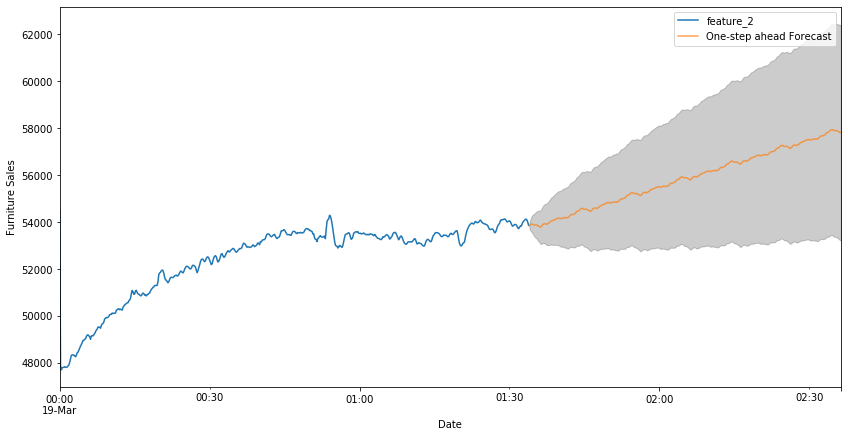

In [53]:
pred = results.get_prediction(start=test.index.min(),end=test.index.max(), dynamic=False)
pred_ci = pred.conf_int()
ax = y.plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')
plt.legend()
plt.show()

In [54]:
test

,id,feature_1
time,,
2019-03-19 01:34:00,564,423.064004
2019-03-19 01:34:10,565,423.342749
2019-03-19 01:34:20,566,423.181186
2019-03-19 01:34:30,567,421.275243
2019-03-19 01:34:40,568,422.208444
...,...,...
2019-03-19 02:35:40,934,432.292203
2019-03-19 02:35:50,935,433.661272
2019-03-19 02:36:00,936,435.686429


In [56]:
df=pd.read_csv("Data/train.csv")

In [57]:
df

,id,time,feature_1,feature_2
0,0,2019-03-19 00:00:00,735.740043,54479.540513
1,1,2019-03-19 00:00:10,734.102947,47888.033714
2,2,2019-03-19 00:00:20,730.060336,47700.882325
3,3,2019-03-19 00:00:30,725.609742,47790.094648
4,4,2019-03-19 00:00:40,724.328480,47808.402381
...,...,...,...,...
559,559,2019-03-19 01:33:10,423.726707,54115.388787
560,560,2019-03-19 01:33:20,424.278568,54127.830664
561,561,2019-03-19 01:33:30,420.127639,54092.561194
562,562,2019-03-19 01:33:40,421.291993,53994.714950


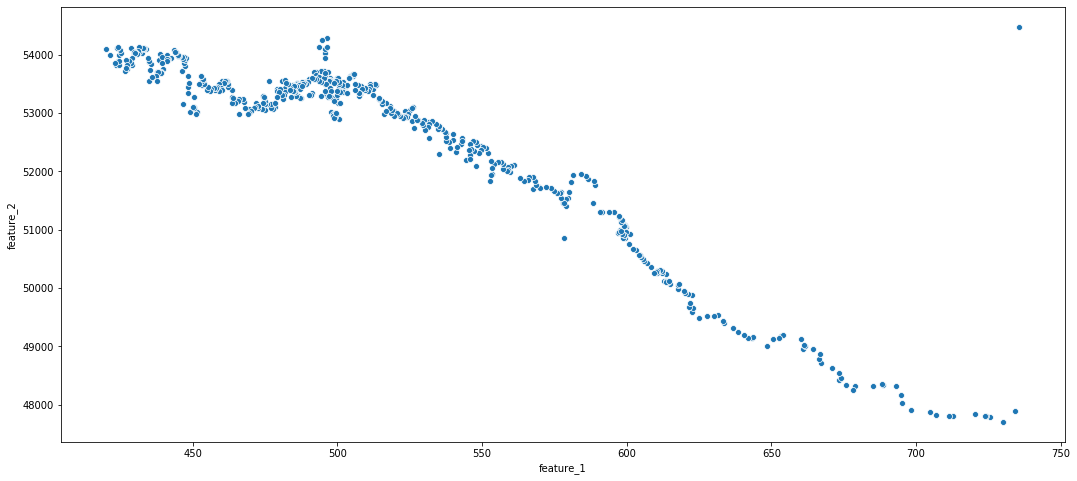

In [59]:
sns.scatterplot(data=df,x='feature_1',y='feature_2')

In [106]:
from scipy import stats
from scipy.stats import norm

In [91]:
def normalize(column):
    upper = column.max()
    lower = column.min()
    y = (column - lower)/(upper-lower)
    return y

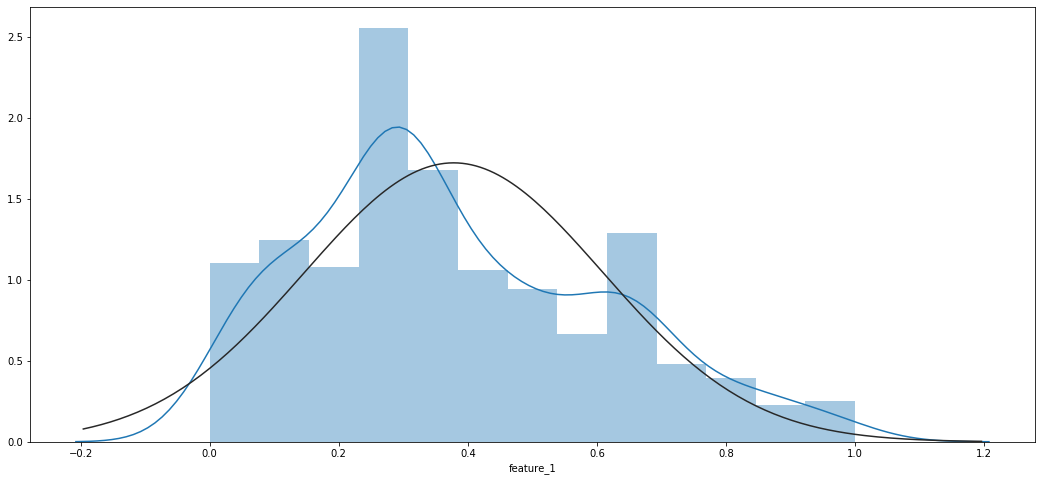

In [107]:
aaa = normalize(np.log1p(df.feature_1))
sns.distplot(aaa,fit=norm)

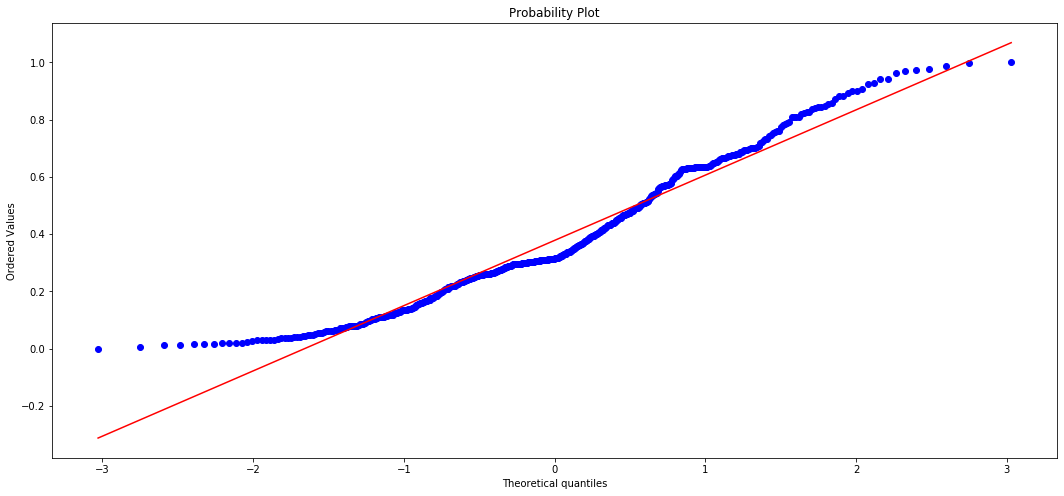

In [108]:
from scipy import stats

fig = plt.figure()
res = stats.probplot(aaa, plot=plt)
plt.show()

In [133]:
df.drop('time',inplace=True,axis=1)

KeyError: "['time'] not found in axis"

In [136]:
y=df.feature_2.values

In [138]:
df.drop('feature_2',inplace=True,axis=1)

In [140]:
df.set_index('id',inplace=True)

In [141]:
df

,feature_1
id,
0,735.740043
1,734.102947
2,730.060336
3,725.609742
4,724.328480
...,...
559,423.726707
560,424.278568
561,420.127639


In [128]:
from sklearn.linear_model import LinearRegression

In [147]:
LR = LinearRegression()
LR.fit(df,y)
LR.score(df,y)

0.8774665173405727

In [154]:
y_hat = LR.predict(df)

In [155]:
from sklearn.metrics import mean_squared_error

In [156]:
np.sqrt(mean_squared_error(y,y_hat))

553.3567851648571

In [160]:
pred = results.get_prediction(start=test.index.min(),end=test.index.max(), dynamic=False)
y_hat_graph = pred.predicted_mean

In [183]:
sol = []
for i in range(len(y_hat_graph)):
    avg = (y_hat_graph[i]+y_hat[i])/2
    sol.append(avg)

In [188]:
solution = pd.DataFrame()

In [194]:
solution['id']=test['id']

In [195]:
solution['feature_2']=sol

In [202]:
solution.reset_index(inplace=True)
solution.drop('time',axis=1,inplace=True)


,feature_2
id,
564,50937.502895
565,50971.700378
566,51028.230356
567,51080.492308
568,51092.732595
...,...
934,55593.866048
935,55565.932759
936,55553.817123


In [205]:
solution.set_index('id',inplace=True)

In [206]:
solution

,feature_2
id,
564,50937.502895
565,50971.700378
566,51028.230356
567,51080.492308
568,51092.732595
...,...
934,55593.866048
935,55565.932759
936,55553.817123


In [207]:
solution.to_csv("Solution.csv")